In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [133]:
import os
os.getcwd()

'F:\\Data Science Course\\Assignment\\Logistics Regression\\Credit risk data'

In [134]:
os.chdir("F:\\Data Science Course\\Assignment\\Logistics Regression\\Credit risk data")

# Importing Data

In [135]:
Bank_data= pd.read_csv("Credit_Risk_data.csv", header =0)
Bank_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
Bank_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [137]:
Bank_data.shape

(614, 13)

# Data Preprocessing
## Checking for Variable Reduction

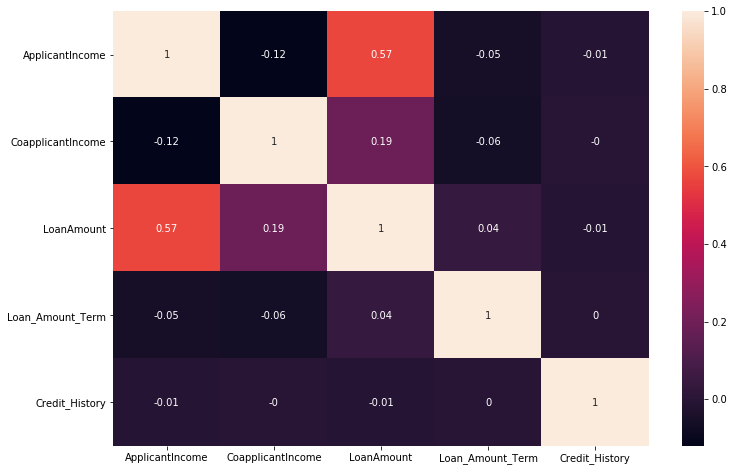

In [138]:
# checking correation matrix for anu corelation among variables, 
correlation_matrix= Bank_data.corr().round(2)
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(data=correlation_matrix, annot=True)

## Checking missing values

In [139]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [140]:
Bank_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
Bank_data = Bank_data.drop(["Loan_ID"], axis=1)

In [142]:
Bank_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

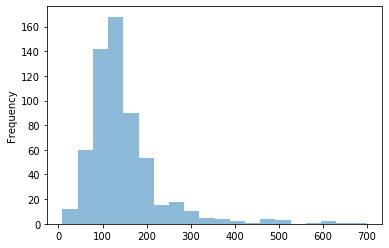

In [143]:
Bank_data["LoanAmount"].plot.hist(alpha=0.5,bins=20);

In [144]:
Bank_data.mean(axis=0)

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [145]:
train_Data =["LoanAmount","Loan_Amount_Term","Credit_History"]

for item in train_Data:
    Bank_data[item].fillna((Bank_data[item].median()), inplace = True)

In [146]:
Bank_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Creation of Dummy Variables

In [147]:
Bank_data = pd.get_dummies(Bank_data,columns= ['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status'], drop_first = True)
Bank_data.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1
7,3+,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,0,1,1
9,1,12841,10968.0,349.0,360.0,1.0,1,1,0,0,1,0,0


In [148]:
Bank_data.shape

(614, 13)

In [149]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Dependents                 599 non-null object
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Loan_Status_Y              614 non-null uint8
dtypes: float64(4), int64(1), object(1), uint8(7)
memory usage: 33.1+ KB


In [150]:
Bank_data["Dependents"].fillna(method = "ffill", inplace = True)
Bank_data.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [151]:
Bank_data= Bank_data.replace(to_replace ='3+', value=3)
Bank_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


## Checking for outliers

In [152]:
Bank_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.796417,0.648208,0.218241,0.133550,0.379479,0.328990,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.402991,0.477919,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
pd.DataFrame(Bank_data,columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
1%,1025.000000,0.000000,30.650000
10%,2216.100000,0.000000,72.300000
30%,3050.400000,0.000000,109.900000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
90%,9459.900000,3782.200000,229.400000


## Checking outliers by plotting Boxplot

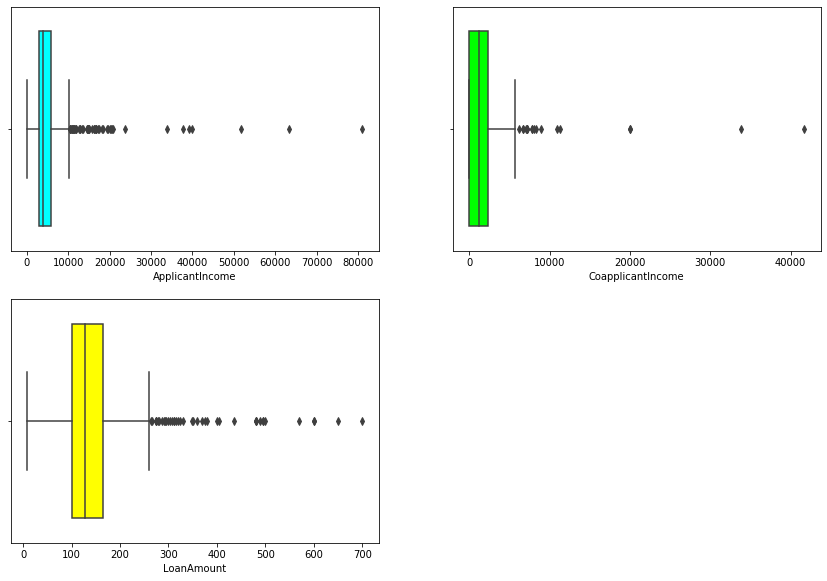

In [154]:
import seaborn as sns
tr_num = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
c = 1
col = ["aqua","lime","yellow"]
plt.figure()
for i in tr_num:
    plt.subplot(3,2,c)
    sns.boxplot(Bank_data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 2,top = 3)
plt.show()

In [155]:
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(Bank_data[i].quantile(q=0.25))
    p75.append(Bank_data[i].quantile(q=0.75))

for i in range(3):
    iqr.append(p75[i]-p25[i])
    
for i in range(3):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    Bank_data.loc[Bank_data[i]>iqrul[j],i] = Bank_data[i].quantile(q=0.985)
    Bank_data.loc[Bank_data[i]<iqrll[j],i] = Bank_data[i].quantile(q=0.015)
    j += 1

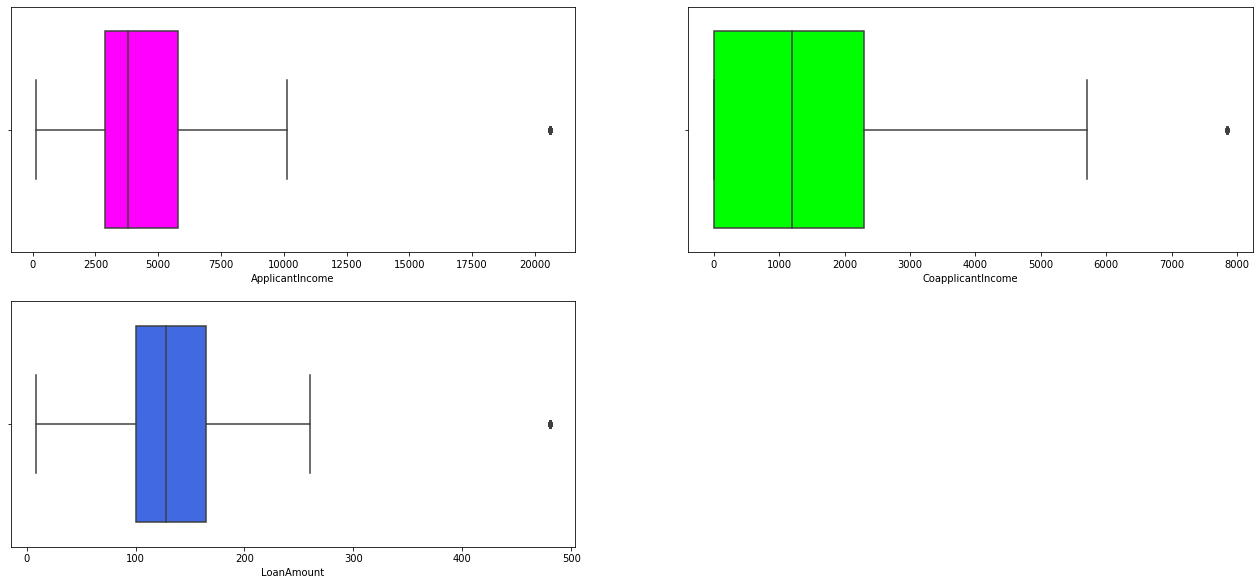

In [156]:
te_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
ct = 1
colt = ["magenta","lime","royalblue"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,ct)
    sns.boxplot(Bank_data[i],boxprops = dict(facecolor = colt[ct-1]))
    ct += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [157]:
ApplicantIncome_col_df = pd.DataFrame(Bank_data['ApplicantIncome'])
ApplicantIncome_median = ApplicantIncome_col_df.median()

Q3 = ApplicantIncome_col_df.quantile(q=0.75)
Q1 = ApplicantIncome_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,ApplicantIncome_median)

Bank_data.loc[Bank_data['ApplicantIncome']>IQR_UL , 'ApplicantIncome'] = ApplicantIncome_col_df.quantile(q=0.99)
Bank_data.loc[Bank_data['ApplicantIncome']<IQR_LL , 'ApplicantIncome'] = ApplicantIncome_col_df.quantile(q=0.01)

-1498 10171 ApplicantIncome    3812.5
dtype: float64


In [158]:
CoapplicantIncome_col_df = pd.DataFrame(Bank_data['CoapplicantIncome'])
CoapplicantIncome_median = CoapplicantIncome_col_df.median()

Q3 = CoapplicantIncome_col_df.quantile(q=0.75)
Q1 = CoapplicantIncome_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,CoapplicantIncome_median)

Bank_data.loc[Bank_data['CoapplicantIncome']>IQR_UL , 'CoapplicantIncome'] = CoapplicantIncome_col_df.quantile(q=0.99)
Bank_data.loc[Bank_data['CoapplicantIncome']<IQR_LL , 'CoapplicantIncome'] = CoapplicantIncome_col_df.quantile(q=0.01)

-3445 5743 CoapplicantIncome    1188.5
dtype: float64


In [159]:
 Bank_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,564.000000,596.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4124.723404,1289.12906,151.956026,342.410423,0.855049,0.796417,0.648208,0.218241,0.133550,0.379479,0.328990,0.687296
std,1926.989806,1461.72508,98.588040,64.428629,0.352339,0.402991,0.477919,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2744.000000,0.00000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3638.500000,1031.00000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5010.500000,2173.00000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,10139.000000,5701.00000,480.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

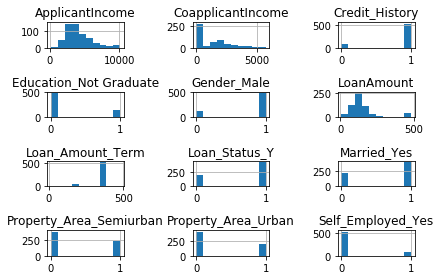

In [160]:
Bank_data.hist()
import seaborn as sns
plt.tight_layout()
plt.show()

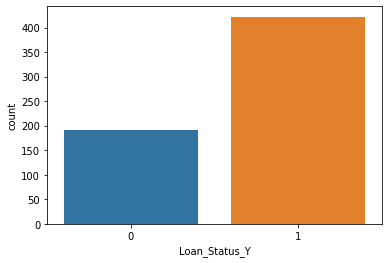

In [161]:
sns.countplot(x="Loan_Status_Y", data = Bank_data)
plt.show()

# Model Creation

In [162]:
x = Bank_data.loc[:,Bank_data.columns != 'Loan_Status_Y']
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [163]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Dependents                 614 non-null object
ApplicantIncome            564 non-null float64
CoapplicantIncome          596 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null int64
Married_Yes                614 non-null int64
Education_Not Graduate     614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area_Urban        614 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 57.6+ KB


In [183]:
train_Data = ["ApplicantIncome","CoapplicantIncome"]

for item in train_Data:
    x[item].fillna((x[item].median()), inplace = True)

In [184]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Dependents                 614 non-null object
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null int64
Married_Yes                614 non-null int64
Education_Not Graduate     614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area_Urban        614 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 57.6+ KB


In [185]:
y = Bank_data.Loan_Status_Y

In [186]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: int64

# Data Split

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state =0)

# Train the model

In [189]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Bishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predict the Test Results

In [190]:
y_pred = logreg.predict(x_test)

# Check Accuracy of the model

In [191]:
from sklearn import metrics
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 0.83


In [192]:
print('Accuracy of logistic regression classifier on test set: %d', (logreg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: %d 0.8324324324324325


# Evaluate the model using Confusion matrix

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 22  29]
 [  2 132]]


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



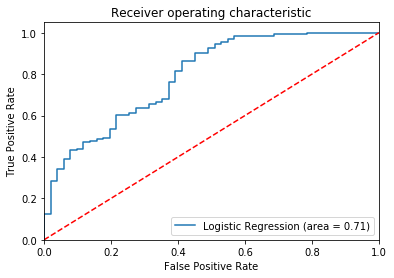

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred) #This is to calculate AUC(Area under curve)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

#plot properties
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()